In [1]:
import matplotlib.pyplot as plt

## 1
修筑水坝，水坝墙壁位置确定，水坝高度确定，均作为输入给出

我们想在中间加注泥土，但是泥土的高度不能与相邻位置墙或者泥土的高度相差超过1

问：在这样的墙体之间，最高能有多高的土墙？

In [3]:
# 例1
wallPosition = [1,2,4,7]
wallHeight = [5,6,8,11]

In [6]:
# 例2
wallPosition = [1,3,7]
wallHeight = [4,3,3]

In [7]:
def maxHeight(wallPosition=wallPosition, wallHeight=wallHeight):
    n = len(wallPosition)
    ans = 0
    mudwall = []
    position = []
    for i in range(n-1):
        Dgap = wallPosition[i+1] - wallPosition[i]
        Hgap = abs(wallHeight[i+1] - wallHeight[i])
        if Dgap < Hgap:
            continue
        else:
            h1, h2 = wallHeight[i], wallHeight[i+1]
            for p in range(1, Dgap):
                position.append(wallPosition[i] + p)
                mudwall.append(min(h2 + Dgap-p, h1 + p))
                ans = max(ans, min(h2 + Dgap-p, h1 + p))
    plt.bar(wallPosition, wallHeight, color= 'red')
    plt.bar(position, mudwall, color= 'blue')
    return ans

5

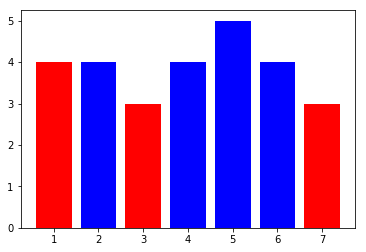

In [9]:
maxHeight()
# 红色是墙，蓝色是土堆

## 2
连接计算机，计算机点群可以通过cable链接，计算机之间只要有路能通就可以算是联通了，现在有一些已经（并不是全部互相）连接的计算机，目前只能通过改变计算机之间的链接来实现全部的计算机都能连起来，也就是拆了东墙补西墙，那么最少需要多少次移动能让这些计算机全部连接起来？如果不存在这样的方案，那么返回-1

In [10]:
# 例1
comp_nodes = 7
comp_edges = 6 +1 
c_from = [1,1,1, 2,2, 3 , 5]
c_to = [2,3,4,3,4,4     , 6]

In [11]:
# 例2
comp_nodes = 4
comp_edges = 3
c_from = [1,1,3]
c_to = [2,3,2]

In [13]:
# 方法一： 找到所有的group，naive brute force
def minMove(c_from, c_to, comp_edges, comp_nodes):
    if comp_edges < comp_nodes - 1:
        return -1
    group_stack = [[set([c_from[0], c_to[0]]), 1]]
    all_connected = set(c_from + c_to)
    # 所有的孤点
    lonely_pt = comp_nodes - len(all_connected)
    def group(c_from, c_to):
        # 构建groups
        cur_group = 1
        for i in range(1, comp_edges):
            for g in group_stack: 
                if (c_from[i] in g[0] or c_to[i] in g[0]):
                    g[0].add(c_from[i])
                    g[0].add(c_to[i])
                    g[1] += 1
                else:
                    group_stack.append([set([c_from[i],c_to[i]]), 1])
        print(group_stack)
        # 总共有多少个group
        return len(group_stack)
    
    total_group = group(c_from, c_to) 
 
    return total_group - 1 + lonely_pt

使用**查并集**的数据结构

https://blog.csdn.net/qq_35116353/article/details/76022022

In [14]:
def minOperation(c_from, c_to, comp_edges, comp_nodes):
    if comp_edges < comp_nodes - 1: # not enough edges to connect all
        return -1
    nodes = [-1] * comp_nodes
    index = range(comp_nodes)
    for i in range(comp_edges):
        root = c_from[i] - 1
        child = c_to[i] - 1
        while nodes[root] >= 0: # this is not a parent root
            root = nodes[root]
        nodes[root] += nodes[child]
        nodes[child] = root
    ops = -1 
    print(nodes)
    for r in nodes:
        if r < 0:
            ops += 1
    return ops

In [15]:
minOperation(c_from, c_to, comp_edges, comp_nodes)

[-3, 0, 0, -1]


1

## 3

购买零食，加入有trays个袋子，现在有n种零食，每种有若干个，想要使得每一种都均分到没一个袋子，问需要再额外卖多少个零食
```python
trays = 2
snacks = [4, 7, 8, 9]
```
那么我们还需要买 [0, 1, 0 ,1]（对应每一种需要买多少），总共2件零食

## 4
循环圈有n个节，endNode代表一堆路径，比如[3,1,2, 4]代表 3->1, 1->2, 2->3->4

问如果走完endNode这些路径，哪一个点被踩的次数最多？（如果有相等的那么返回最小的node的数值）


## 5
字符串转化

从s到ss要完成几个转换任务

1. 从s种找到最小的字母，作为ss的首字母
2. 从剩下的里面找比s大的字母（一定要更大，相等的不行）作为ss的第二个
3. 重复上述，直到么有更大的了
4. 从剩下的里面找比那个最大的小一个的字母填上去
5. 从剩下的里面找比刚才添上去的更小的一个
6. 如果不符合2，5规则，说明一堆相等的，那么我们就随便挑一个就行

例子：

```python
s = "bacba"
```
经历：
1. ss = "a", s="bbcba"
2. ss = "ab" s="bcba"
3. ss = "abc" s="bba"
4. ss = "abcb" s= "ba"
5. ss = "abcba" s= "b"
6. ss = "abcbab"

思路：

先用一个counter算算大家都有多少个，简单利用key拍一下顺序，然后从左往右刷，再从右往左刷，在从左往右...直到把所有的counter里的字母occur次数刷到零，也就代表把s抽空了